Dear Participant,

Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of dementia is increased.

Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician.

Use the provided dataset in order to do your analysis.

#Attribute Information:

#Matrix column entries (attributes):
#name - ASCII subject name and recording number
#MDVP:Fo(Hz) - Average vocal fundamental frequency
#MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
#MDVP:Flo(Hz) - Minimum vocal fundamental frequency
#MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several 
#measures of variation in fundamental frequency
#MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
#NHR,HNR - Two measures of ratio of noise to tonal components in the voice
#status - Health status of the subject (one) - Parkinson's, (zero) - healthy
#RPDE,D2 - Two nonlinear dynamical complexity measures
#DFA - Signal fractal scaling exponent
#spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

In [1]:
# Import required library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/Users/adi/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
pd.set_option('display.max_columns',None)

### Q1. Load the dataset 

In [5]:
df=pd.read_csv('parkinsons.csv')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


### Q2. Use the .describe() method on the dataset and state any insights you may come across.

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [ ]:
from describe we get an idea of the spread of the data
in the second column we can see that MDVP:Fhi(Hz) has outliers as the 75th percentile and max are far apart
the other data looks scaled and hence it may be hard to come to a conclusion

### Q3. Check for class imbalance. Do people with Parkinson's have greater representation in the dataset?

In [8]:
df['status'].value_counts()   

1    147
0     48
Name: status, dtype: int64

In [ ]:
there are 147 people with parkinsons and 48 people without parkinsons

### Q4. Check for missing vaues and take necessary measures by dropping observation or imputing them.

In [9]:
df.isnull().sum()   

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [ ]:
no null values in the dataset

### Q5. Plot the distribution of all the features. State any observations you can make based on the distribution plots.

In [18]:
df.drop('name',1,inplace=True)

In [19]:
X=df.drop('status',1)
y=df['status']

In [20]:
plt.style.use('fivethirtyeight')

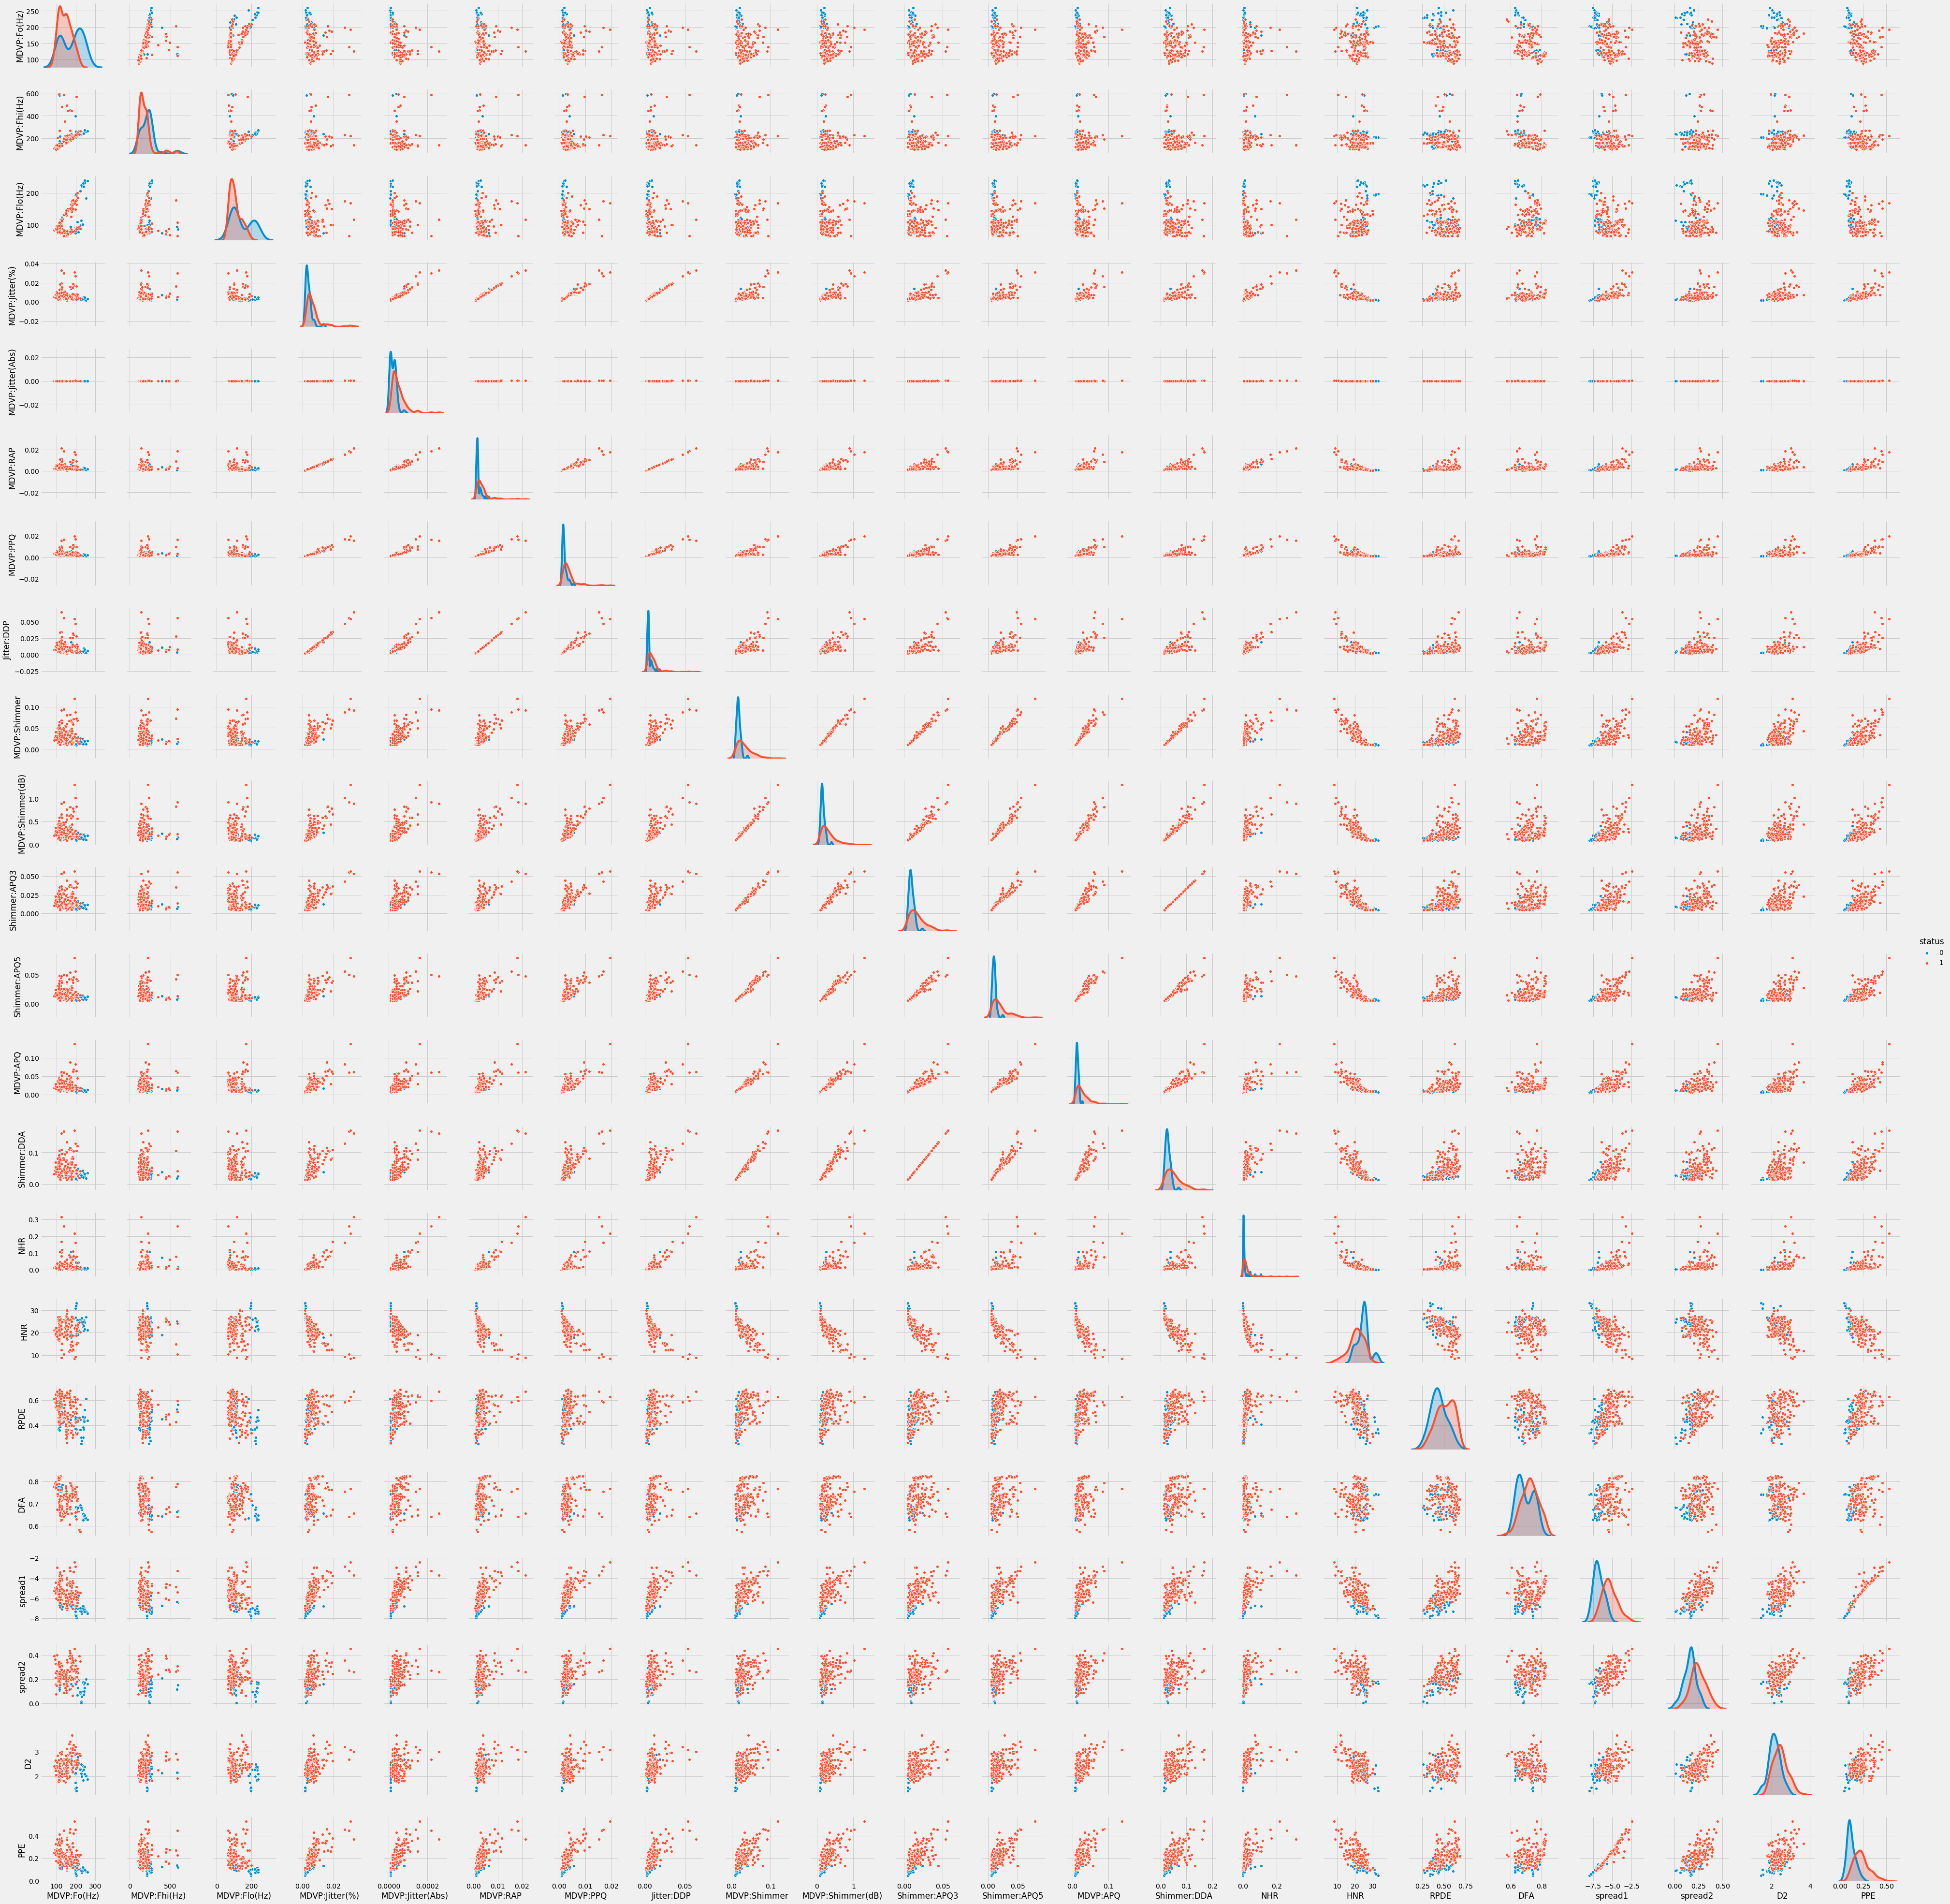

In [21]:
sns.pairplot(data=df,vars=X.columns,hue='status')

In [23]:
X.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE'],
      dtype='object')

In [24]:
X[X['MDVP:Fo(Hz)']

0      119.992
1      122.400
2      116.682
3      116.676
4      116.014
        ...   
190    174.188
191    209.516
192    174.688
193    198.764
194    214.289
Name: MDVP:Fo(Hz), Length: 195, dtype: float64

In [27]:
df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [32]:
df1=df.loc[df['status']==1]
df0=df.loc[df['status']==0]

In [33]:
df0.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
30,197.076,206.896,192.055,0.00289,0.000010,0.00166,0.00168,0.00498,0.01098,0.097,0.00563,0.00680,0.00802,0.01689,0.00339,26.775,0,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569
31,199.228,209.512,192.091,0.00241,0.000010,0.00134,0.00138,0.00402,0.01015,0.089,0.00504,0.00641,0.00762,0.01513,0.00167,30.940,0,0.432439,0.742055,-7.682587,0.173319,2.103106,0.068501
32,198.383,215.203,193.104,0.00212,0.000010,0.00113,0.00135,0.00339,0.01263,0.111,0.00640,0.00825,0.00951,0.01919,0.00119,30.775,0,0.465946,0.738703,-7.067931,0.175181,1.512275,0.096320
33,202.266,211.604,197.079,0.00180,0.000009,0.00093,0.00107,0.00278,0.00954,0.085,0.00469,0.00606,0.00719,0.01407,0.00072,32.684,0,0.368535,0.742133,-7.695734,0.178540,1.544609,0.056141
34,203.184,211.526,196.160,0.00178,0.000009,0.00094,0.00106,0.00283,0.00958,0.085,0.00468,0.00610,0.00726,0.01403,0.00065,33.047,0,0.340068,0.741899,-7.964984,0.163519,1.423287,0.044539


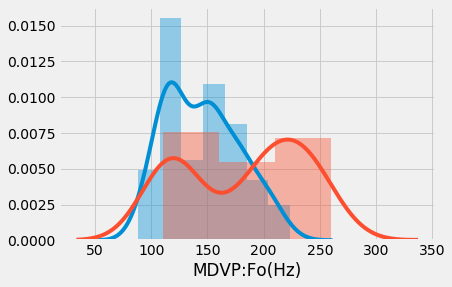

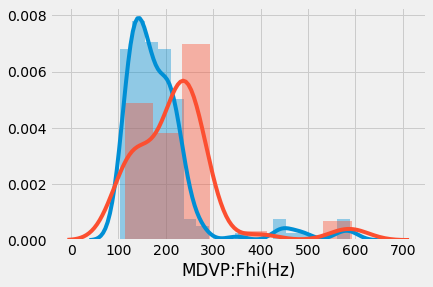

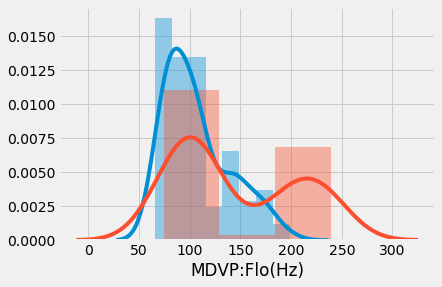

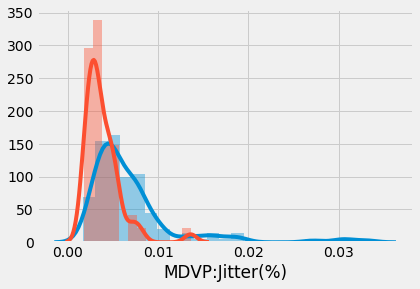

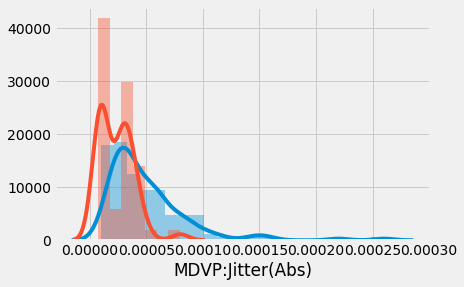

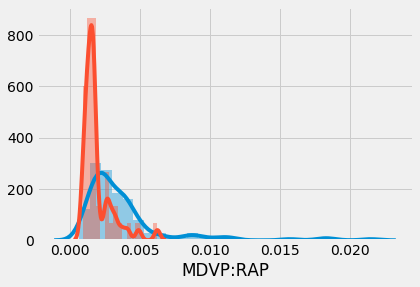

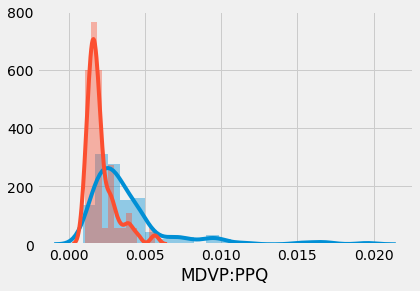

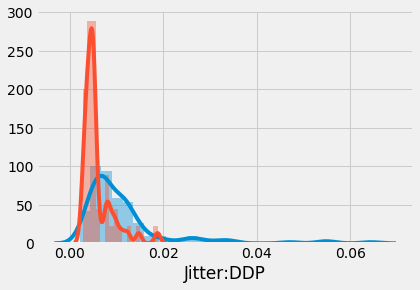

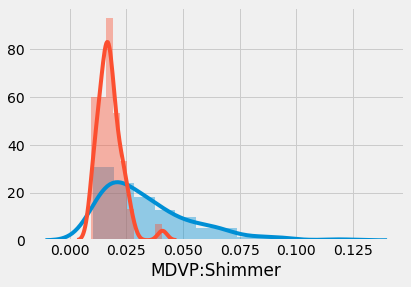

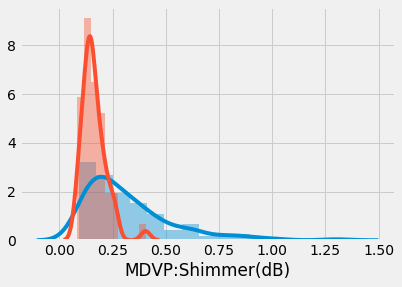

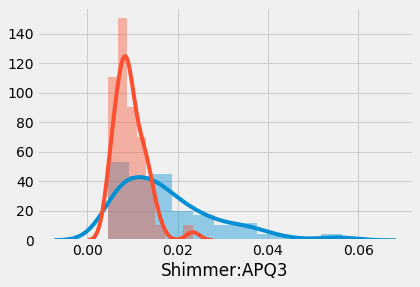

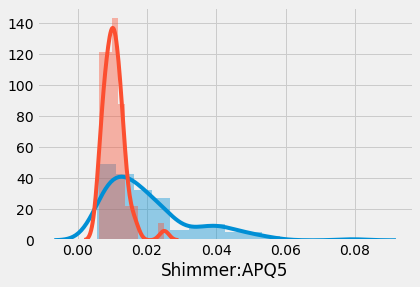

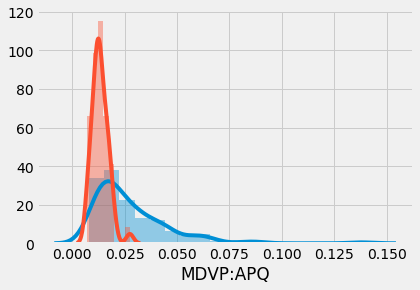

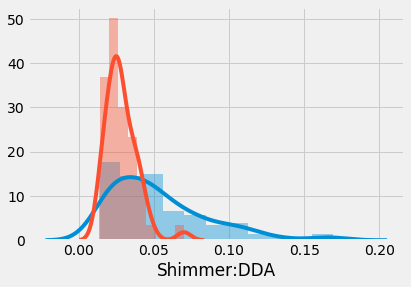

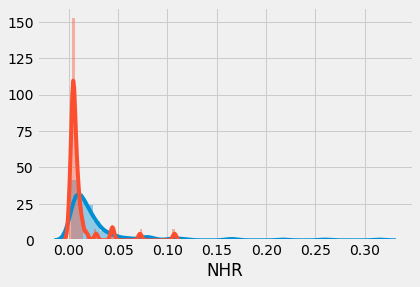

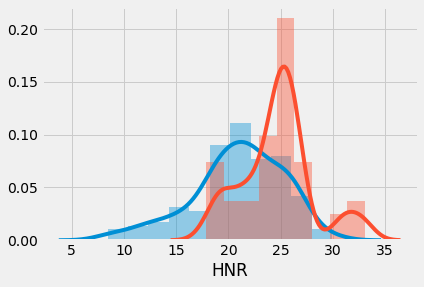

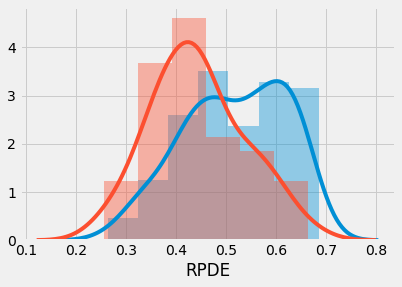

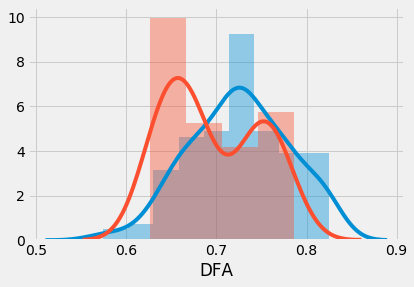

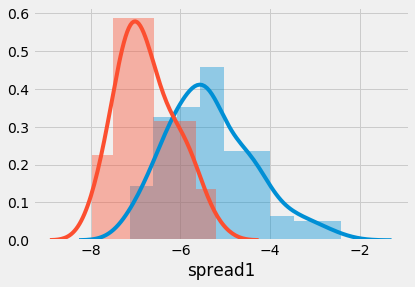

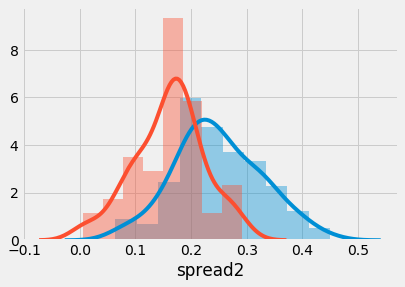

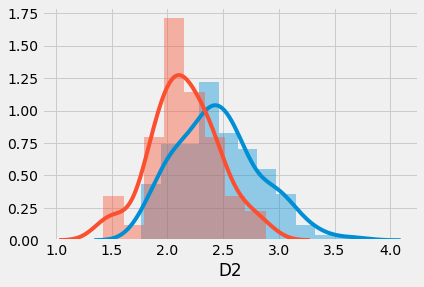

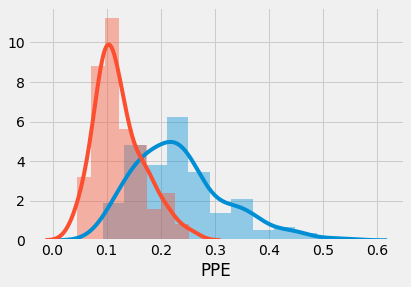

In [34]:
for col in X.columns:
    sns.distplot(df1[col])
    sns.distplot(df0[col])
    plt.show()

In [11]:
print(plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


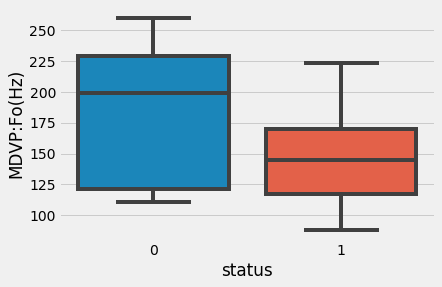

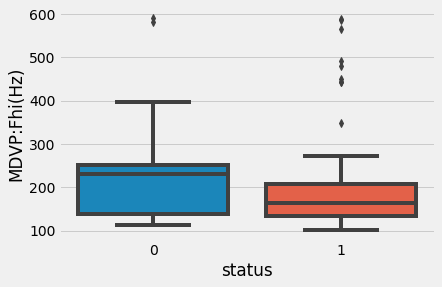

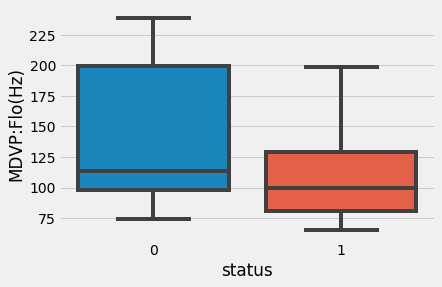

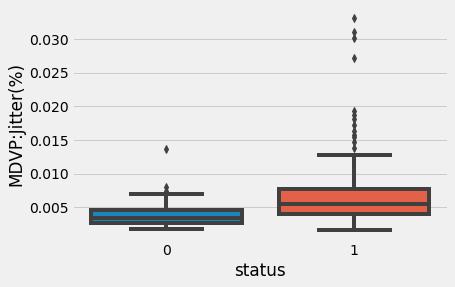

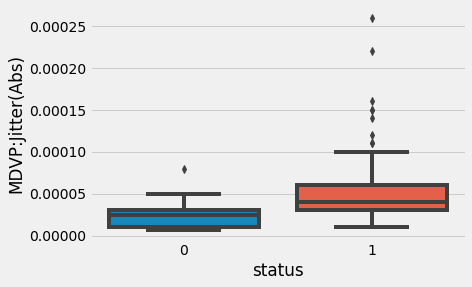

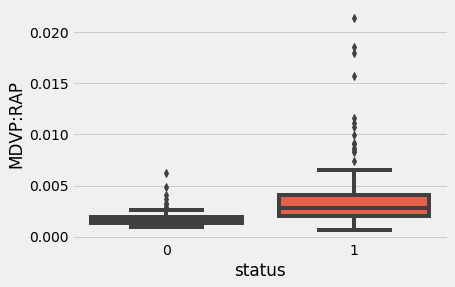

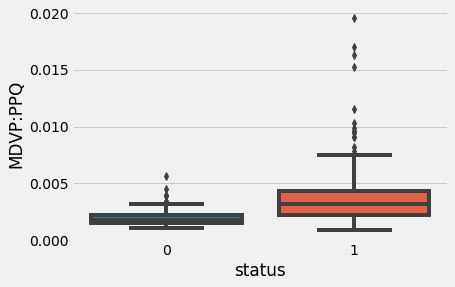

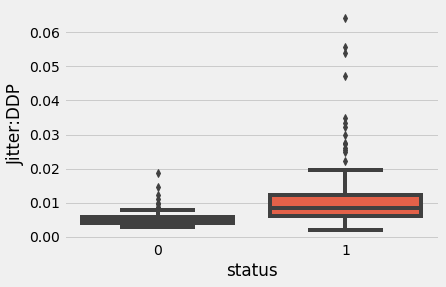

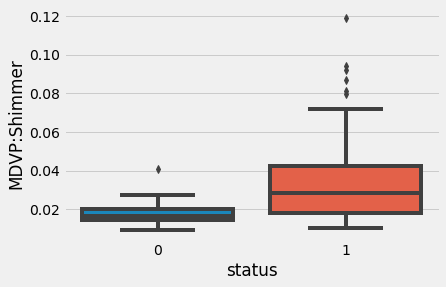

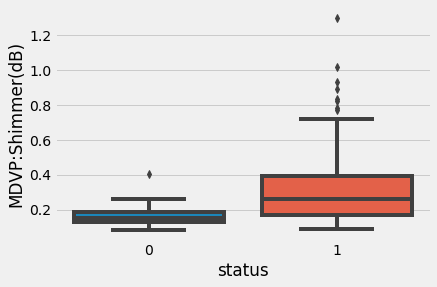

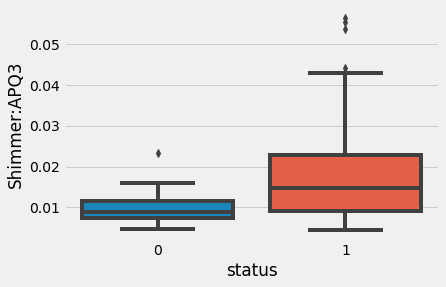

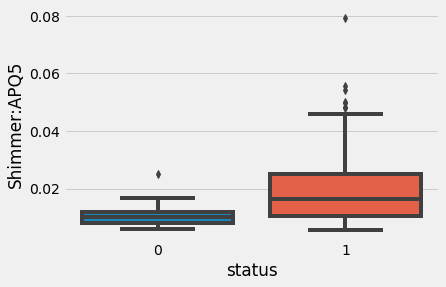

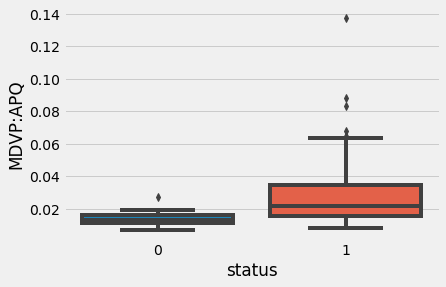

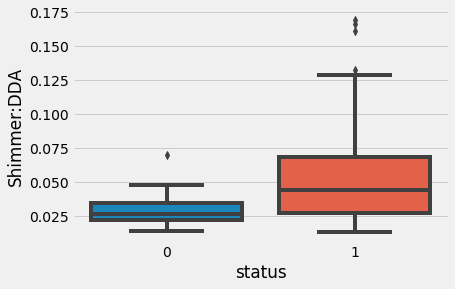

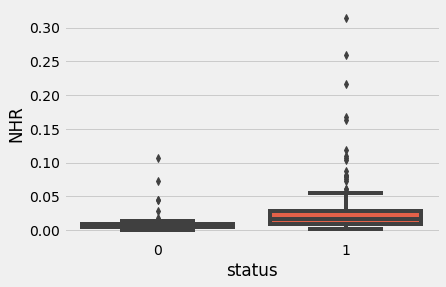

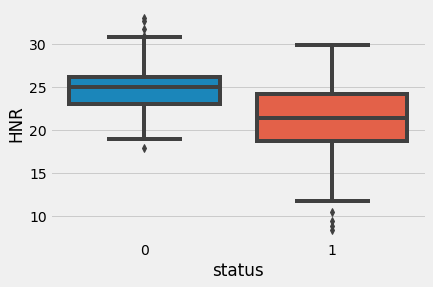

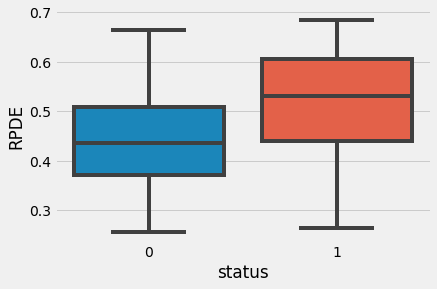

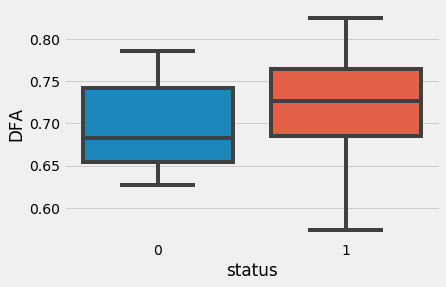

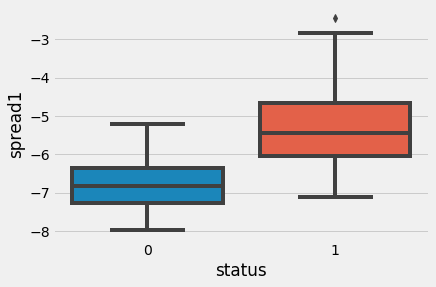

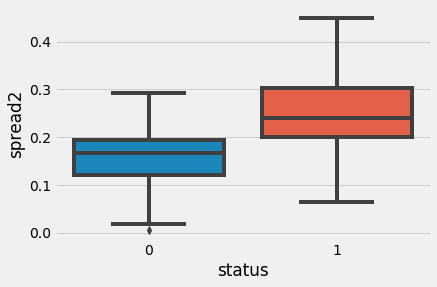

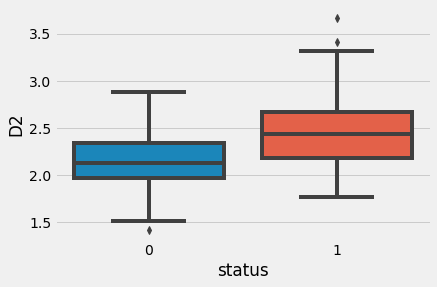

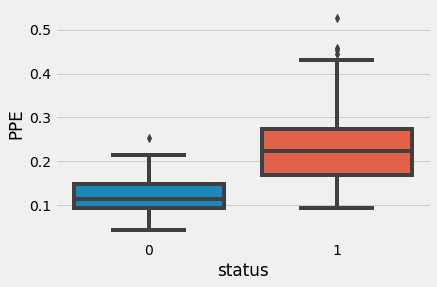

In [39]:
for i in X.columns:
    sns.boxplot(y=df[i],x=df['status'])
    plt.show()

### Q6. Check for outliers in the data. Are there any variables with high amount of outliers.

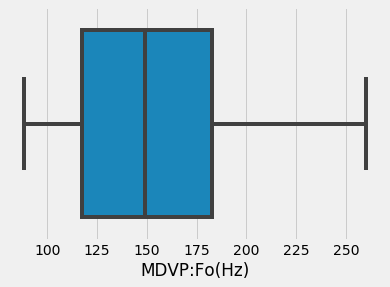

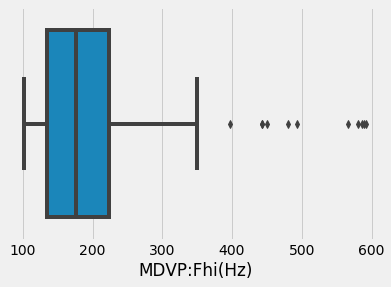

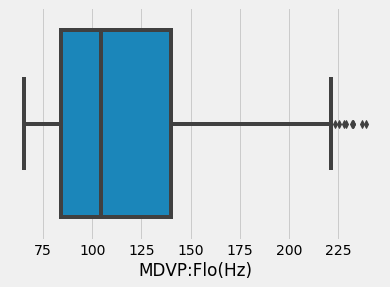

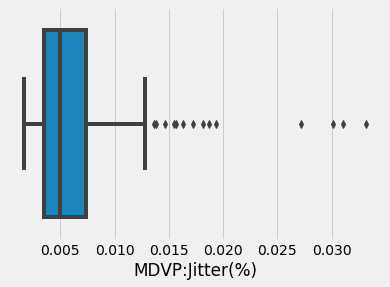

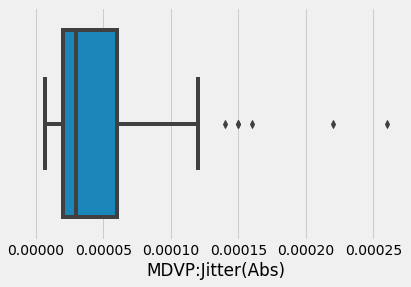

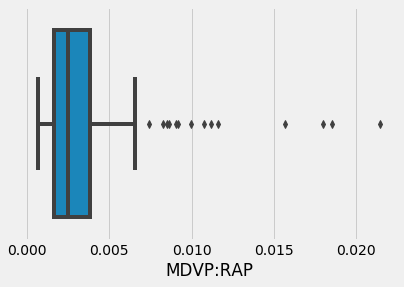

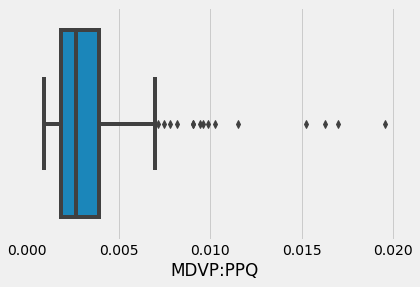

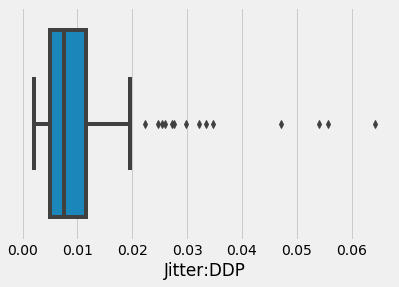

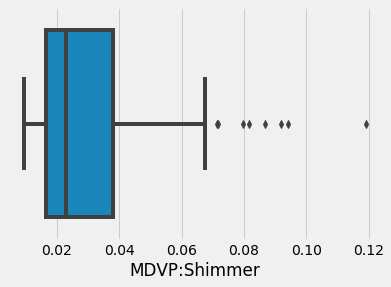

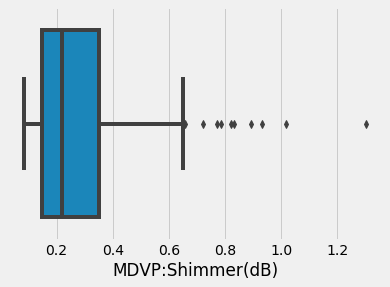

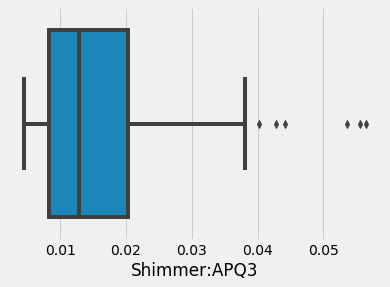

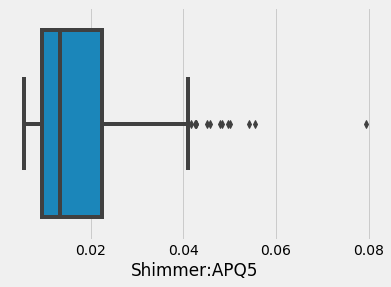

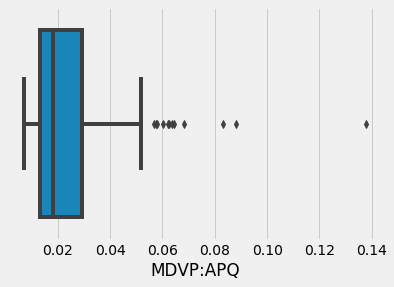

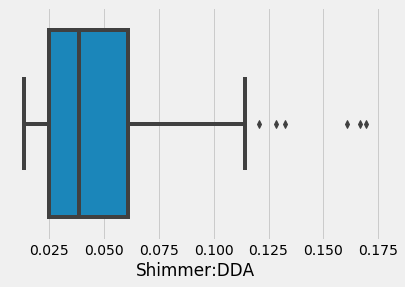

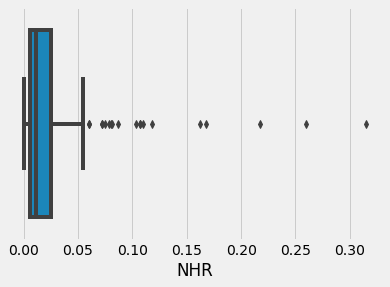

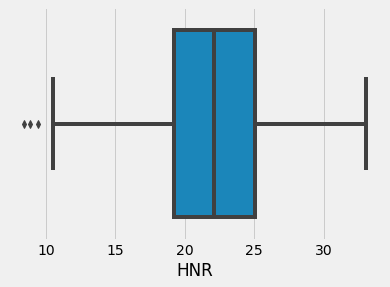

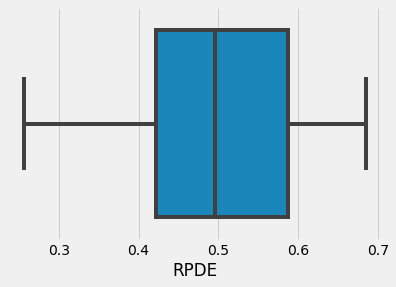

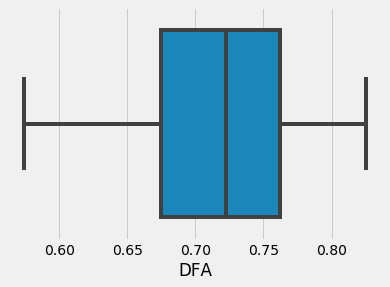

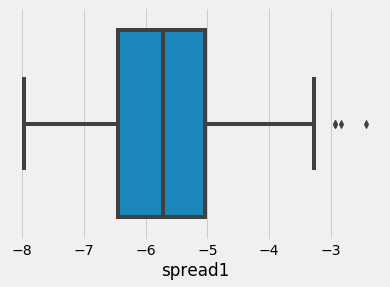

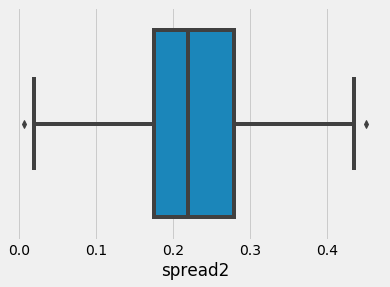

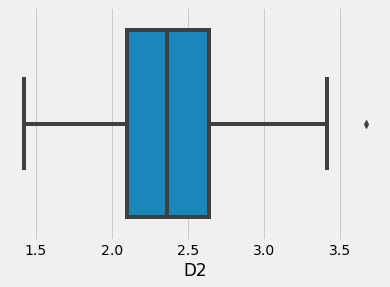

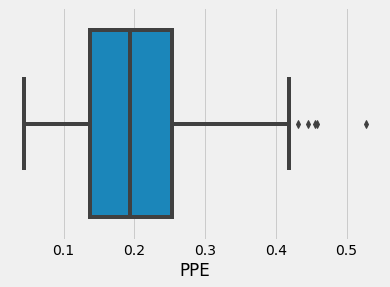

In [40]:
for i in X.columns:
    sns.boxplot(df[i])
    plt.show()
    

In [ ]:
there are outliers in certain columns

### Q7. Are there any strong correlations among the independent features?

In [49]:
df_corr=X.corr()
plt.figure(figsize=(10,10))
df_corr[(df_corr>0.7)&(df_corr<1)]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MDVP:Fhi(Hz),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MDVP:Flo(Hz),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MDVP:Jitter(%),NaN,NaN,NaN,NaN,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,0.746625,0.725561,0.758255,0.746635,0.906959,NaN,NaN,NaN,NaN,NaN,NaN,0.721543
MDVP:Jitter(Abs),NaN,NaN,NaN,0.935714,NaN,0.922911,0.897778,0.922913,0.703322,0.716601,NaN,NaN,NaN,NaN,0.834972,NaN,NaN,NaN,0.735779,NaN,NaN,0.748162
MDVP:RAP,NaN,NaN,NaN,0.990276,0.922911,NaN,0.957317,1.000000,0.759581,0.790652,0.744912,0.709927,0.737455,0.744919,0.919521,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MDVP:PPQ,NaN,NaN,NaN,0.974256,0.897778,0.957317,NaN,0.957319,0.797826,0.839239,0.763580,0.786780,0.804139,0.763592,0.844604,NaN,NaN,NaN,0.716489,NaN,NaN,0.769647
Jitter:DDP,NaN,NaN,NaN,0.990276,0.922913,1.000000,0.957319,NaN,0.759555,0.790621,0.744894,0.709907,0.737439,0.744901,0.919548,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MDVP:Shimmer,NaN,NaN,NaN,0.769063,0.703322,0.759581,0.797826,0.759555,NaN,0.987258,0.987625,0.982835,0.950083,0.987626,0.722194,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MDVP:Shimmer(dB),NaN,NaN,NaN,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,NaN,0.963198,0.973751,0.960977,0.963202,0.744477,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Figure size 720x720 with 0 Axes>

In [ ]:
there are certain columns with strong relation and this adds to the multi collinearity.
hence we may have to treat the relation between these incase our model isnt performing well

### Q8. Split dataset into training & test dataset  

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Q9. Create a default decision tree model using criterion = Entropy 

In [56]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve

In [57]:
from sklearn.tree import DecisionTreeClassifier

dtree=DecisionTreeClassifier(criterion='entropy')

dtree.fit(X_train,y_train)

y_train_pred=dtree.predict(X_train)
y_train_prob=dtree.predict_proba(X_train)[:,1]

y_test_pred=dtree.predict(X_test)
y_test_prob=dtree.predict_proba(X_test)[:,1]

print('Confusion matrix','\n',confusion_matrix(y_train,y_train_pred))
print('Accuracy Score',accuracy_score(y_train,y_train_pred))
print('AUC Score',roc_auc_score(y_train,y_train_prob))

print('\n')

print('Confusion matrix','\n',confusion_matrix(y_test,y_test_pred))
print('Accuracy Score',accuracy_score(y_test,y_test_pred))
print('AUC Score',roc_auc_score(y_test,y_test_prob))


Confusion matrix 
 [[ 33   0]
 [  0 103]]
Accuracy Score 1.0
AUC Score 1.0


Confusion matrix 
 [[10  5]
 [ 3 41]]
Accuracy Score 0.864406779661017
AUC Score 0.7992424242424242


In [ ]:
an extremely overfit model and hence we should tune it

### Q10.  Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? 

In [59]:
from scipy.stats import randint as sp_randint

In [60]:
from sklearn.model_selection import RandomizedSearchCV


dtree=DecisionTreeClassifier(criterion='entropy')

params={'max_depth':sp_randint(1,15),'min_samples_split':sp_randint(1,50),'min_samples_leaf':sp_randint(2,50)}

rsearch=RandomizedSearchCV(estimator=dtree,param_distributions=params,n_iter=50,scoring='roc_auc',cv=3,random_state=42)
rsearch.fit(X_train,y_train)

/Users/adi/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/adi/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/adi/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 894, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/adi/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 231, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Users/adi/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this tra

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(criterion='entropy'),
                   n_iter=50,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb252cafd90>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb252cbb1d0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb252cafe50>},
                   random_state=42, scoring='roc_auc')

In [61]:
rsearch.best_params_

{'max_depth': 11, 'min_samples_leaf': 10, 'min_samples_split': 15}

In [62]:
dtree=DecisionTreeClassifier(**rsearch.best_params_,criterion='entropy')

dtree.fit(X_train,y_train)

y_train_pred=dtree.predict(X_train)
y_train_prob=dtree.predict_proba(X_train)[:,1]

y_test_pred=dtree.predict(X_test)
y_test_prob=dtree.predict_proba(X_test)[:,1]

print('Confusion matrix','\n',confusion_matrix(y_train,y_train_pred))
print('Accuracy Score',accuracy_score(y_train,y_train_pred))
print('AUC Score',roc_auc_score(y_train,y_train_prob))

print('\n')

print('Confusion matrix','\n',confusion_matrix(y_test,y_test_pred))
print('Accuracy Score',accuracy_score(y_test,y_test_pred))
print('AUC Score',roc_auc_score(y_test,y_test_prob))

Confusion matrix 
 [[32  1]
 [ 9 94]]
Accuracy Score 0.9264705882352942
AUC Score 0.9739629302736099


Confusion matrix 
 [[13  2]
 [ 6 38]]
Accuracy Score 0.864406779661017
AUC Score 0.906060606060606


In [ ]:
The model is still little overfitting but compared to before it is giving us good results
AUC SCORE OF 0.973 on training and 0.906 on testing part

### Q11. Implement a Random Forest model. What is the optimal number of trees that gives the best result?

In [64]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()

rf.fit(X_train,y_train)

y_train_pred=rf.predict(X_train)
y_train_prob=rf.predict_proba(X_train)[:,1]

y_test_pred=rf.predict(X_test)
y_test_prob=rf.predict_proba(X_test)[:,1]

print('Confusion matrix','\n',confusion_matrix(y_train,y_train_pred))
print('Accuracy Score',accuracy_score(y_train,y_train_pred))
print('AUC Score',roc_auc_score(y_train,y_train_prob))

print('\n')

print('Confusion matrix','\n',confusion_matrix(y_test,y_test_pred))
print('Accuracy Score',accuracy_score(y_test,y_test_pred))
print('AUC Score',roc_auc_score(y_test,y_test_prob))

Confusion matrix 
 [[ 33   0]
 [  0 103]]
Accuracy Score 1.0
AUC Score 1.0


Confusion matrix 
 [[12  3]
 [ 1 43]]
Accuracy Score 0.9322033898305084
AUC Score 0.9681818181818183


In [ ]:
a little overfitting, lets tune the hyper parameters

In [65]:
rf=RandomForestClassifier()

params={'n_estimators':sp_randint(100,200),'criterion':['gini','entropy'],'max_depth':sp_randint(1,15),
        'min_samples_split':sp_randint(2,50),'min_samples_leaf':sp_randint(1,50)}

rsearch=RandomizedSearchCV(estimator=rf,param_distributions=params,n_iter=50,scoring='roc_auc',cv=3,
                           random_state=42)
rsearch.fit(X_train,y_train)


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb252e7cd90>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb252e88f10>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb252e88b10>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb2529d8cd0>},
                   random_state=42, scoring='roc_auc')

In [66]:
rsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 189}

In [67]:
rf=RandomForestClassifier(**rsearch.best_params_)

rf.fit(X_train,y_train)

y_train_pred=rf.predict(X_train)
y_train_prob=rf.predict_proba(X_train)[:,1]

y_test_pred=rf.predict(X_test)
y_test_prob=rf.predict_proba(X_test)[:,1]

print('Confusion matrix','\n',confusion_matrix(y_train,y_train_pred))
print('Accuracy Score',accuracy_score(y_train,y_train_pred))
print('AUC Score',roc_auc_score(y_train,y_train_prob))

print('\n')

print('Confusion matrix','\n',confusion_matrix(y_test,y_test_pred))
print('Accuracy Score',accuracy_score(y_test,y_test_pred))
print('AUC Score',roc_auc_score(y_test,y_test_prob))

Confusion matrix 
 [[ 22  11]
 [  0 103]]
Accuracy Score 0.9191176470588235
AUC Score 0.999117387466902


Confusion matrix 
 [[ 9  6]
 [ 1 43]]
Accuracy Score 0.8813559322033898
AUC Score 0.956060606060606


In [ ]:
our original random forest classifier performed better on the test data set than the one after tuning
we can stick with our orignal model itself
we can clearly see that random forest performs better than decision tree 

# THE END